<a href="https://colab.research.google.com/github/stutigarg1/Pixel-Perfect/blob/main/Lab_7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

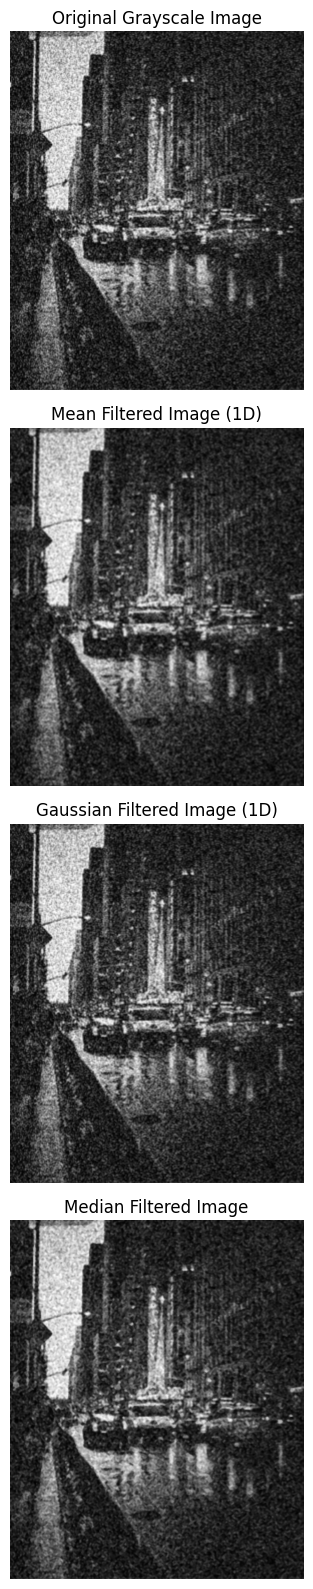

True

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image (replace with your path)
image = cv2.imread('/content/city.PNG')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define a mean filter (1D)
def mean_filter_1d(kernel_size):
    return np.ones(kernel_size) / kernel_size

# Define a Gaussian filter (1D)

# Apply Median Filter
def apply_median_filter(image, kernel_size):
    return cv2.medianBlur(image, ksize=kernel_size)  # OpenCV function

# Create filters
mean_kernel = mean_filter_1d(kernel_size=5)
gaussian_kernel = gaussian_filter_1d(kernel_size=5, sigma=1)

# Apply filters to the grayscale image
mean_filtered_image = apply_1d_filter(gray_image, mean_kernel)
gaussian_filtered_image = apply_1d_filter(gray_image, gaussian_kernel)
median_filtered_image = apply_median_filter(gray_image, kernel_size=5)

# Plot the original and filtered images
plt.figure(figsize=(15, 16))

# Original Image
plt.subplot(4, 1, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Mean Filtered Image
plt.subplot(4, 1, 2)
plt.title('Mean Filtered Image (1D)')
plt.imshow(mean_filtered_image, cmap='gray')
plt.axis('off')

# Gaussian Filtered Image
plt.subplot(4, 1, 3)
plt.title('Gaussian Filtered Image (1D)')
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.axis('off')

# Median Filtered Image
plt.subplot(4, 1, 4)
plt.title('Median Filtered Image')
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save filtered images
cv2.imwrite('mean_filtered_image.png', mean_filtered_image)
cv2.imwrite('gaussian_filtered_image.png', gaussian_filtered_image)
cv2.imwrite('median_filtered_image.png', median_filtered_image)


In [ ]:
# Load an image (replace with your path)
image = cv2.imread('/content/city.PNG')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Define a mean filter (1D)
def mean_filter_1d(kernel_size):
    return np.ones(kernel_size) / kernel_size

In [ ]:
# Define a Gaussian filter (1D)
def gaussian_filter_1d(kernel_size, sigma):
    x = np.linspace(-3*sigma, 3*sigma, kernel_size)
    kernel = np.exp(-0.5 * (x ** 2) / (sigma ** 2))
    return kernel / np.sum(kernel)  # Normalize

In [ ]:
# Apply 1D filters to the image
def apply_1d_filter(image, kernel):
    # Apply the filter to each row
    filtered_image_rows = np.zeros_like(image)
    for i in range(image.shape[0]):
        filtered_image_rows[i, :] = np.convolve(image[i, :], kernel, mode='same')

    # Apply the filter to each column
    filtered_image_columns = np.zeros_like(filtered_image_rows)
    for j in range(filtered_image_rows.shape[1]):
        filtered_image_columns[:, j] = np.convolve(filtered_image_rows[:, j], kernel, mode='same')

    return filtered_image_columns

In [ ]:
# Create filters
mean_kernel = mean_filter_1d(kernel_size=5)
gaussian_kernel = gaussian_filter_1d(kernel_size=5, sigma=1)

# Apply filters to the grayscale image
mean_filtered_image = apply_1d_filter(gray_image, mean_kernel)
gaussian_filtered_image = apply_1d_filter(gray_image, gaussian_kernel)


In [ ]:
# Define a mean filter (2D)
def mean_filter_2d(kernel_size):
    return np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

# Define a Gaussian filter (2D)
def gaussian_filter_2d(kernel_size, sigma):
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (xx**2 + yy**2) / (sigma**2))
    return kernel / np.sum(kernel)  # Normalize

# Apply 2D convolution to the image
def apply_2d_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)  # Using OpenCV's filter2D function

# Apply Median Filter
def apply_median_filter(image, kernel_size):
    return cv2.medianBlur(image, ksize=kernel_size)

# Create filters
mean_kernel = mean_filter_2d(kernel_size=5)
gaussian_kernel = gaussian_filter_2d(kernel_size=5, sigma=1)

# Apply filters to the grayscale image
mean_filtered_image = apply_2d_filter(gray_image, mean_kernel)
gaussian_filtered_image = apply_2d_filter(gray_image, gaussian_kernel)
median_filtered_image = apply_median_filter(gray_image, kernel_size=5)

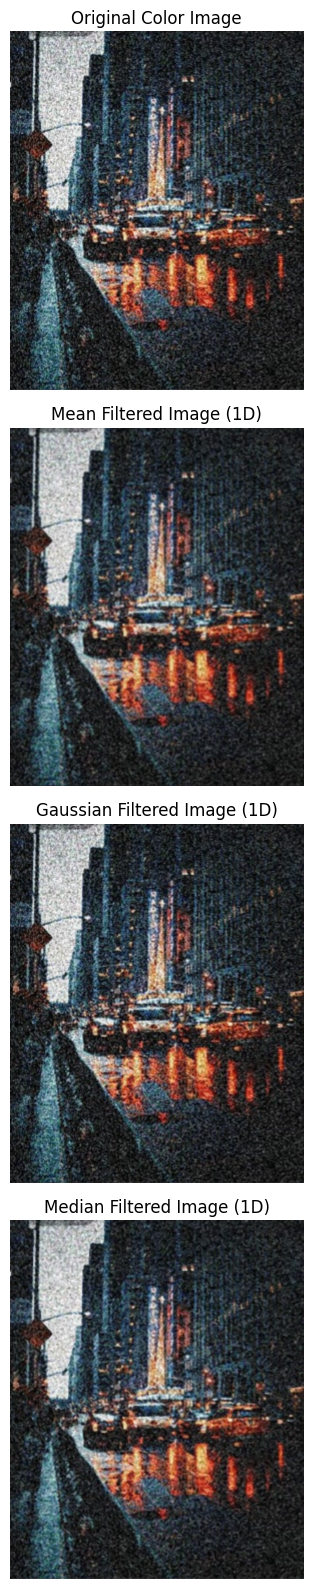

True

In [ ]:

# Define a mean filter (1D)
def mean_filter_1d(kernel_size):
    return np.ones(kernel_size) / kernel_size

# Define a Gaussian filter (1D)
def gaussian_filter_1d(kernel_size, sigma):
    x = np.linspace(-3*sigma, 3*sigma, kernel_size)
    kernel = np.exp(-0.5 * (x ** 2) / (sigma ** 2))
    return kernel / np.sum(kernel)  # Normalize

# Apply 1D filters to the image
def apply_1d_filter(image, kernel):
    # Apply the filter to each row
    filtered_image_rows = np.zeros_like(image)
    for i in range(image.shape[0]):
        for channel in range(3):
            filtered_image_rows[i, :, channel] = np.convolve(image[i, :, channel], kernel, mode='same')

    # Apply the filter to each column
    filtered_image_columns = np.zeros_like(filtered_image_rows)
    for j in range(filtered_image_rows.shape[1]):
        for channel in range(3):
            filtered_image_columns[:, j, channel] = np.convolve(filtered_image_rows[:, j, channel], kernel, mode='same')

    return filtered_image_columns

# Apply Median Filter
def apply_median_filter(image, kernel_size):
    median_filtered_image = np.zeros_like(image)
    for channel in range(3):
        median_filtered_image[:, :, channel] = cv2.medianBlur(image[:, :, channel], ksize=kernel_size)
    return median_filtered_image

# Create filters
mean_kernel = mean_filter_1d(kernel_size=5)
gaussian_kernel = gaussian_filter_1d(kernel_size=5, sigma=1)


# Apply filters to the color image (separately for each channel)

mean_filtered_image = apply_1d_filter(image, mean_kernel)
gaussian_filtered_image = apply_1d_filter(image, gaussian_kernel)
median_filtered_image = apply_median_filter(image, kernel_size=5)

# Plot the original and filtered images
plt.figure(figsize=(15, 16))

# Original Image
plt.subplot(4, 1, 1)
plt.title('Original Color Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')

# Mean Filtered Image
plt.subplot(4, 1, 2)
plt.title('Mean Filtered Image (1D)')
plt.imshow(cv2.cvtColor(mean_filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Gaussian Filtered Image
plt.subplot(4, 1, 3)
plt.title('Gaussian Filtered Image (1D)')
plt.imshow(cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Median Filtered Image
plt.subplot(4, 1, 4)
plt.title('Median Filtered Image (1D)')
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

# Save filtered images
cv2.imwrite('mean_filtered_color_image_1d.png', mean_filtered_image)
cv2.imwrite('gaussian_filtered_color_image_1d.png', gaussian_filtered_image)
cv2.imwrite('median_filtered_color_image_1d.png', median_filtered_image)


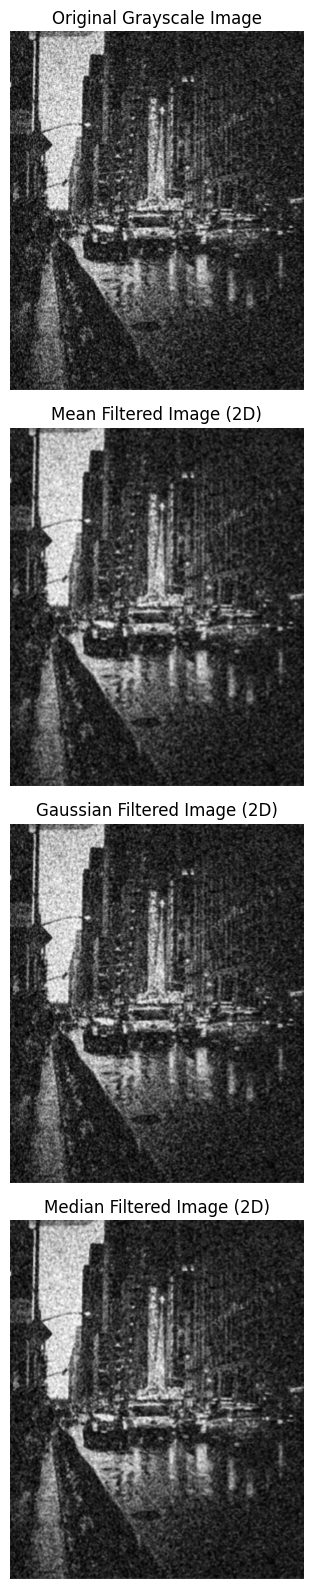

True

In [ ]:
# Plot the original and filtered images
plt.figure(figsize=(15, 16))

# Original Image
plt.subplot(4, 1, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Mean Filtered Image
plt.subplot(4, 1, 2)
plt.title('Mean Filtered Image (2D)')
plt.imshow(mean_filtered_image, cmap='gray')
plt.axis('off')

# Gaussian Filtered Image
plt.subplot(4, 1, 3)
plt.title('Gaussian Filtered Image (2D)')
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.axis('off')

# Median Filtered Image
plt.subplot(4, 1, 4)
plt.title('Median Filtered Image (2D)')
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save filtered images
cv2.imwrite('mean_filtered_image_2d.png', mean_filtered_image)
cv2.imwrite('gaussian_filtered_image_2d.png', gaussian_filtered_image)
cv2.imwrite('median_filtered_image_2d.png', median_filtered_image)


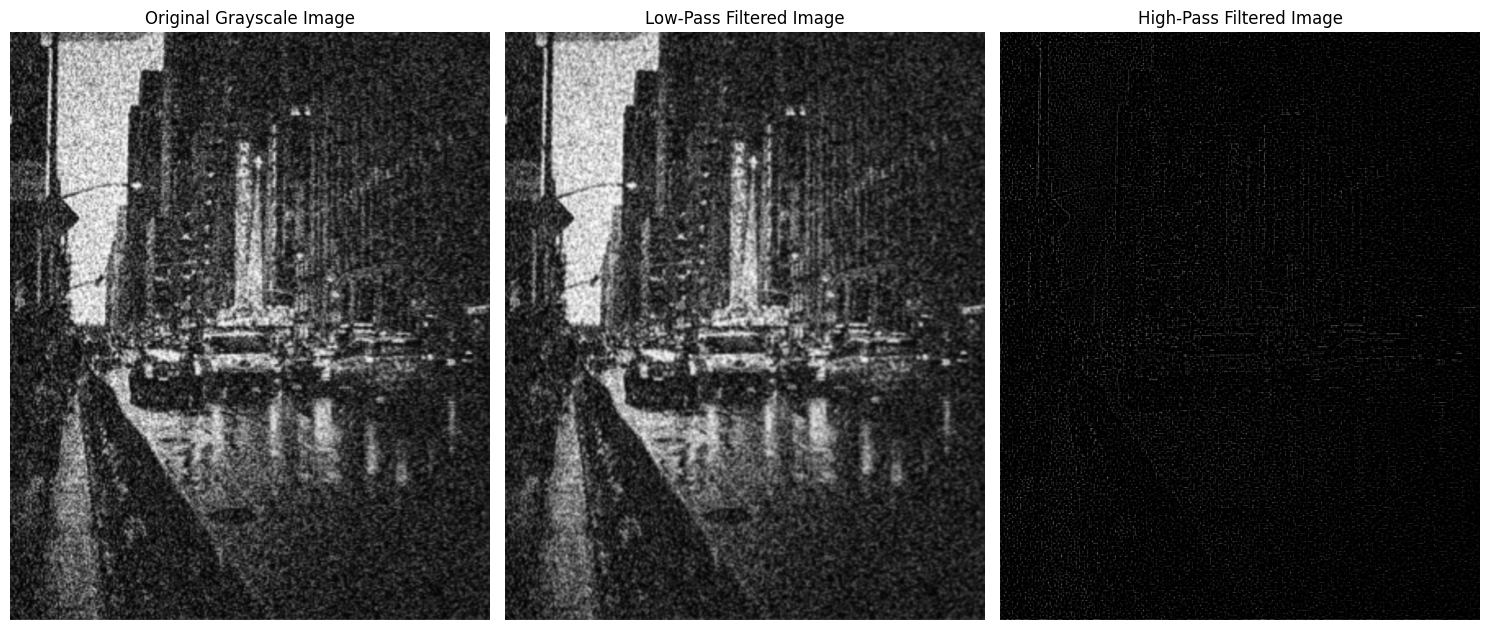

True

In [ ]:
# Define a low-pass filter (average filter)
low_pass_kernel = np.array([[1/9, 1/9, 1/9],
                             [1/9, 1/9, 1/9],
                             [1/9, 1/9, 1/9]])

# Define a high-pass filter (Laplacian filter)
high_pass_kernel = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]])


# Apply filters to the grayscale image
low_pass_filtered_image = cv2.filter2D(gray_image, -1, low_pass_kernel)
high_pass_filtered_image = cv2.filter2D(gray_image, -1, high_pass_kernel)

# Plot the original and filtered images
plt.figure(figsize=(15, 8))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Low-Pass Filtered Image
plt.subplot(1, 3, 2)
plt.title('Low-Pass Filtered Image')
plt.imshow(low_pass_filtered_image, cmap='gray')
plt.axis('off')

# High-Pass Filtered Image
plt.subplot(1, 3, 3)
plt.title('High-Pass Filtered Image')
plt.imshow(high_pass_filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save filtered images
cv2.imwrite('low_pass_filtered_image.png', low_pass_filtered_image)
cv2.imwrite('high_pass_filtered_image.png', high_pass_filtered_image)


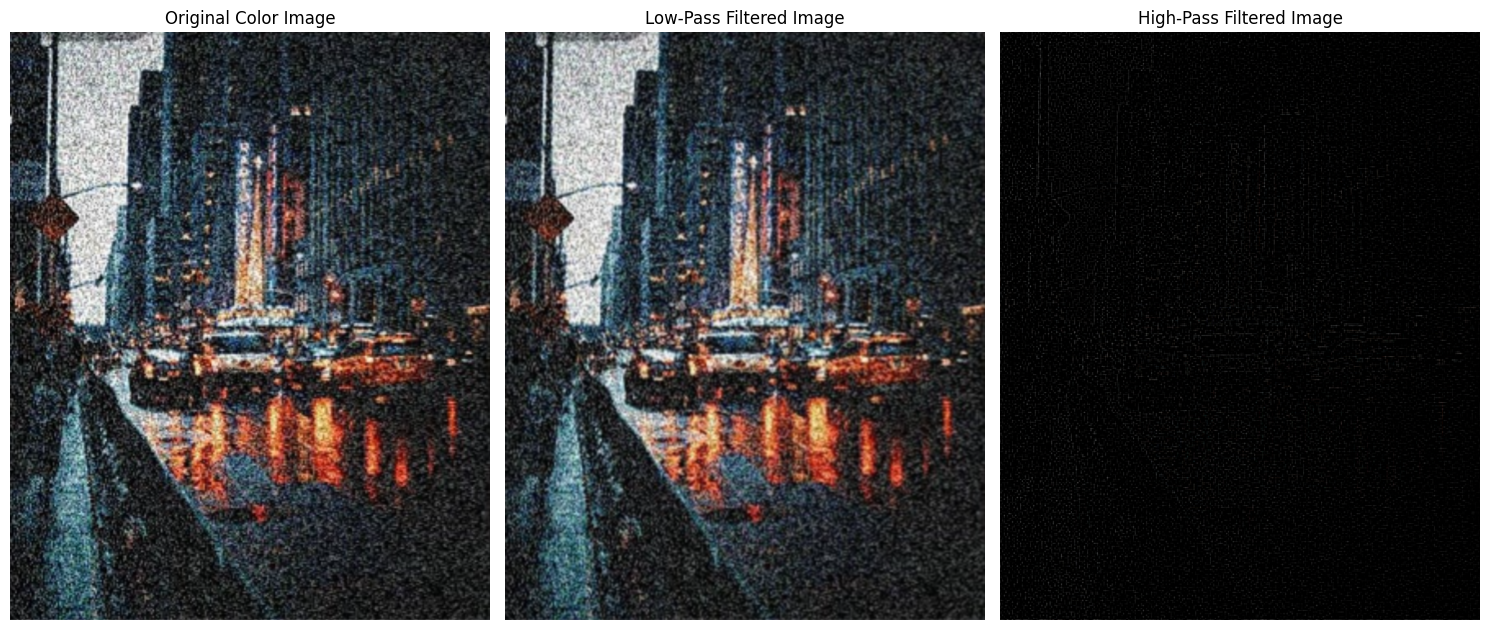

True

In [ ]:
# Define a low-pass filter (average filter)
low_pass_kernel = np.array([[1/9, 1/9, 1/9],
                             [1/9, 1/9, 1/9],
                             [1/9, 1/9, 1/9]])

# Define a high-pass filter (Laplacian filter)
high_pass_kernel = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]])

# Apply filters to the color image (separately for each channel)
low_pass_filtered_image = np.zeros_like(image)
high_pass_filtered_image = np.zeros_like(image)

for channel in range(3):  # Loop through BGR channels
    low_pass_filtered_image[:, :, channel] = cv2.filter2D(image[:, :, channel], -1, low_pass_kernel)
    high_pass_filtered_image[:, :, channel] = cv2.filter2D(image[:, :, channel], -1, high_pass_kernel)

# Plot the original and filtered images
plt.figure(figsize=(15, 8))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Original Color Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')

# Low-Pass Filtered Image
plt.subplot(1, 3, 2)
plt.title('Low-Pass Filtered Image')
plt.imshow(cv2.cvtColor(low_pass_filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# High-Pass Filtered Image
plt.subplot(1, 3, 3)
plt.title('High-Pass Filtered Image')
plt.imshow(cv2.cvtColor(high_pass_filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

# Save filtered images
cv2.imwrite('low_pass_filtered_color_image.png', low_pass_filtered_image)
cv2.imwrite('high_pass_filtered_color_image.png', high_pass_filtered_image)
